# Motivacion

 Un intervalo de tolerancia cubre al menos una proporción determinada $ρ$ de la población con un grado de confianza determinado: $100(1-α)$%. con $0≤α,ρ≤1$. 
 
 Este intervalo de tolerancia se puede denotar como  : $\frac{100(1-α)\%}{100ρ\%}$.
 * al menos $\rho \%$ de la población es cubierta por el intervalo de tolerancia con una probabilidad de 1-$\alpha$.

In [1]:
from  IPython.display import Image 

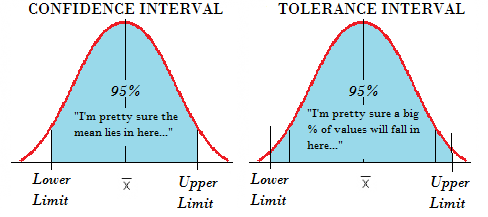

In [4]:
Image(filename = "C:/Users/URIEL/Pictures/Tolerance Interval.png")

 Intervalo de Confianza 
 * La probabilidad de que el intervalo ($\theta_{1}$,$\theta_{2}$) contenga el valor de $\theta$ es 1-$\alpha$. 
 
 
 * $P(\theta_{1}<\theta<\theta_{2}) = 1 - \alpha$ siendo $\theta_{1}$ y $\theta_{2}$ estadisticos de la muestra aleatoria y $0\leq \alpha \leq 1$.

 
 
 Intervalo de Tolerancia
 * La probabilidad de que al menos un $\rho$ % de la población se encuentren dentro de cierto intervalo es 1-$\alpha$.
 
 
 * $ P(P(L<X<U)\geq \rho) \geq 1-\alpha$ llamado intervalo de tolerancia bilateral. 
 
 * $ P(P(L<X)\geq \rho) \geq 1-\alpha$ llamado intervalo de tolerancia superior unilateral.
 
 * $ P(P(X<U)\geq \rho) \geq 1-\alpha$ llamado intervalo de tolerancia unilateral inferior. 
 
 
 
  siendo ($L,U$) un intervalo aleatorio con $L$ y $U$ estadisticos de la muestra aleatoria y $0\leq \alpha,\rho \leq 1$.

Se han propuesto diferentes metodos para el calculo de intervalos de tolerancia que centran sus estudios en estimar los límites de
tolerancia de variables aleatorias cuya función de probabilidad se desconoce a partir de la
metodología de estadísticos ordenados de muestras aleatorias. 

Uno de ellos es el Metodo de Wilks, metodo no paramétrico, no obstante existen otras aproximaciones  tanto paramétricas
como no paramétricas que permiten estimar un intervalo de tolerancia.

## Metodo de Wilks 

En el método de Wilks, sea w el límite superior de tolerancia, entonces
$$𝑃(−\infty ≤ 𝑋_{i} ≤ 𝑤) ≥ \rho$$.

la estimación de $w$ puede escribirse como $ŵ = ŵ(X)$. Sobre todas las posibles muestras se
puede requerir que 

$$𝑃((−\infty ≤ 𝑋_{i} ≤ ŵ) ≥ \rho)≥1-\alpha$$
La expresión anterior define un intervalo de tolerancia .

La interpretación de la ecuación
anterior es que al menos $100\rho$ % de la población es cubierta por el intervalo de tolerancia con
una probabilidad 1-$\alpha$%.

El límite superior w del intervalo de tolerancia dado por la Ecuación anterior se interpreta como
un límite de tolerancia conservador, es decir, el límite indica el valor extremo que cubre al
menos $\rho$% de la población con una confianza de 1-$\alpha$%.

## Aplicación del intervalo de tolerancia en el control estadístico de calidad. 

Ejemplo

un ingeniero de calidad de un fabricante de bombillas necesita evaluar la vida útil de las bombillas. El ingeniero recoge aleatoriamente una muestra de 100 bombillas e informa de los tiempos hasta el fallo. El ingeniero quiere calcular un límite inferior de tolerancia del 95%/99%, que es el tiempo de combustión que supera al menos el 99% de las bombillas con un 95% de confianza. Supongamos que el límite inferior de tolerancia basado en una distribución normal es 1085,947, por lo que el ingeniero puede afirmar que al menos el 99% de todas las bombillas superan aproximadamente 1086 horas de tiempo de combustión con un 95% de confianza. Los intervalos de tolerancia serían de especial interés para establecer los límites de la capacidad del proceso para un producto fabricado en grandes cantidades. 



## Ejemplo Practico de Intervalo de Tolerancia Bilateral

Se desea el intervalo de tolerancia bilateral para el peso (gr) de una pieza metálica. Se tomó una muestra aleatoria de 40 ítems con un promedio de 420.3 y desviación estandar 1.15. Se desea abarcar el 99% del peso poblacional con una confianza del 95%. 

 Para una distribución normal el intervalo de tolerancia tiene la forma $(k(s)-\bar{x},\bar{x}+k(s))$ con $s$ siendo la desviación estandar.

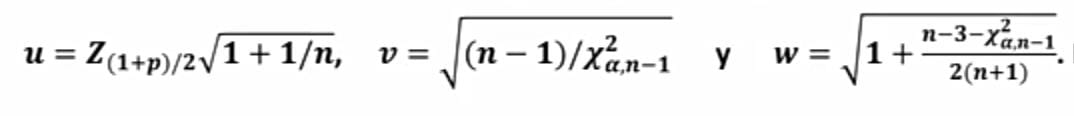

In [65]:
Image(filename = "C:/Users/URIEL/Pictures/Formulas.jpeg")

In [62]:
#se tiene 
p = 0.99
alpha = 0.05
n = 40 
promedio = 420.3
desv_est = 1.15

In [25]:
from scipy import stats
import numpy as np
from scipy.stats import norm
def Cuantil_Distribucion_Continua(distribucion,p):
    import numpy as np 
    x_1 = np.linspace(distribucion.ppf(0.01),
                  distribucion.ppf(0.99), 100)
    fda_normal = distribucion.cdf(x_1) # Función de Distribución Acumulada
    
    for i in range(len(fda_normal)):
        if fda_normal[i] == p or fda_normal[i]>p:
            x_p = x_1[i]
        else:
            continue
        
    return x_p

In [31]:
Cuantil_Distribucion_Continua(stats.norm(0,1),0.99)

2.3263478740408408

In [26]:
u = Cuantil_Distribucion_Continua(stats.norm(0,1),0.99) * np.sqrt(1+(1/n))

In [27]:
u

2.3552477134753143

In [39]:
Cuantil_Distribucion_Continua(stats.gamma((n-1)/2,1/2),alpha)

31.71406050809245

In [43]:
v = np.sqrt((n-1)/Cuantil_Distribucion_Continua(stats.gamma((n-1)/2,1/2),alpha))

In [44]:
v

1.1089357340354902

In [50]:
gamma = Cuantil_Distribucion_Continua(stats.gamma((n-1)/2,1/2),alpha)

In [52]:
(n-3-(gamma))/2*(n+1)

108.36175958410475

In [55]:
w = np.sqrt(1+(n-3-(gamma))/2*(n+1))

In [56]:
k = u*v*w

In [63]:
promedio-k*(desv_est), promedio+k*(desv_est) #siendo este el intervalo de tolerancia

(388.8895937018948, 451.7104062981052)

## Interpretacion 

Con un 95% de confianza se estima que el 99% del peso de los ítems está entre (388.8895937018948, 451.7104062981052).